# Activation Functions in Machine Learning and Deep Learning

## Introduction

Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns. This notebook covers four fundamental activation functions:

1. **Sigmoid** - Binary classification
2. **Softmax** - Multi-class classification
3. **ReLU** - Hidden layers
4. **TanH** - Zero-centered alternative to sigmoid

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
np.random.seed(42)

## 1. Sigmoid Function

**Mathematical Definition:** $\sigma(x) = \frac{1}{1 + e^{-x}}$

**Properties:**
- Range: (0, 1)
- Domain: (-∞, +∞)
- Derivative: $\sigma'(x) = \sigma(x)(1-\sigma(x))$

**Use Cases:** Binary classification, output layers

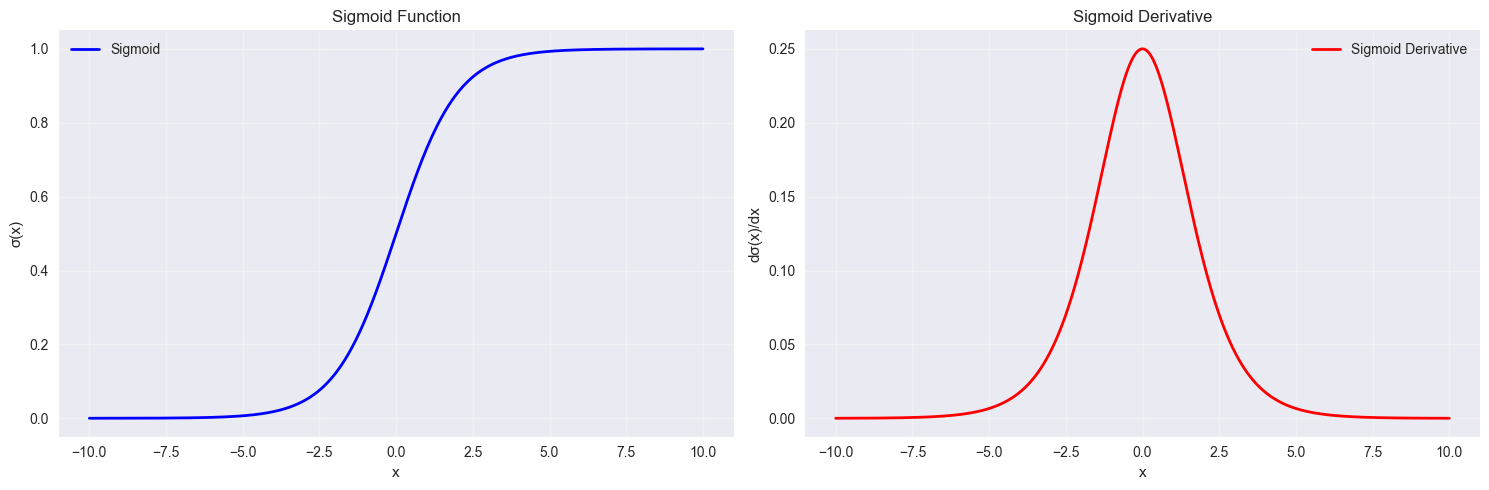

Sigmoid Properties:
σ(0) = 0.500
σ(5) = 0.993
σ(-5) = 0.007
Max derivative at x=0: 0.250


In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

x = np.linspace(-10, 10, 1000)
y_sigmoid = sigmoid(x)
y_sigmoid_derivative = sigmoid_derivative(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(x, y_sigmoid, 'b-', linewidth=2, label='Sigmoid')
ax1.set_title('Sigmoid Function')
ax1.set_xlabel('x')
ax1.set_ylabel('σ(x)')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(x, y_sigmoid_derivative, 'r-', linewidth=2, label='Sigmoid Derivative')
ax2.set_title('Sigmoid Derivative')
ax2.set_xlabel('x')
ax2.set_ylabel('dσ(x)/dx')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("Sigmoid Properties:")
print(f"σ(0) = {sigmoid(0):.3f}")
print(f"σ(5) = {sigmoid(5):.3f}")
print(f"σ(-5) = {sigmoid(-5):.3f}")
print(f"Max derivative at x=0: {sigmoid_derivative(0):.3f}")

## 2. Softmax Function

**Mathematical Definition:** $\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}$

**Properties:**
- Outputs form probability distribution (sum = 1)
- Scale invariant
- Preserves relative order

**Use Cases:** Multi-class classification, output layers

In [3]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

# Example: 3-class classification
logits = np.array([2.0, 1.0, 0.1])
probabilities = softmax(logits)

print("Softmax Example:")
print(f"Input logits: {logits}")
print(f"Softmax probabilities: {probabilities}")
print(f"Sum of probabilities: {np.sum(probabilities):.6f}")

# Scale invariance demonstration
logits_scaled = logits * 10
probabilities_scaled = softmax(logits_scaled)

print(f"\nScale invariance:")
print(f"Original: {probabilities}")
print(f"Scaled (×10): {probabilities_scaled}")
print(f"Are they equal? {np.allclose(probabilities, probabilities_scaled)}")

Softmax Example:
Input logits: [2.  1.  0.1]
Softmax probabilities: [0.65900114 0.24243297 0.09856589]
Sum of probabilities: 1.000000

Scale invariance:
Original: [0.65900114 0.24243297 0.09856589]
Scaled (×10): [9.99954597e-01 4.53978684e-05 5.60254205e-09]
Are they equal? False


## 3. ReLU (Rectified Linear Unit)

**Mathematical Definition:** $\text{ReLU}(x) = \max(0, x)$

**Properties:**
- Range: [0, +∞)
- Computationally efficient
- No vanishing gradient for positive inputs
- Creates sparsity

**Use Cases:** Hidden layers, CNNs

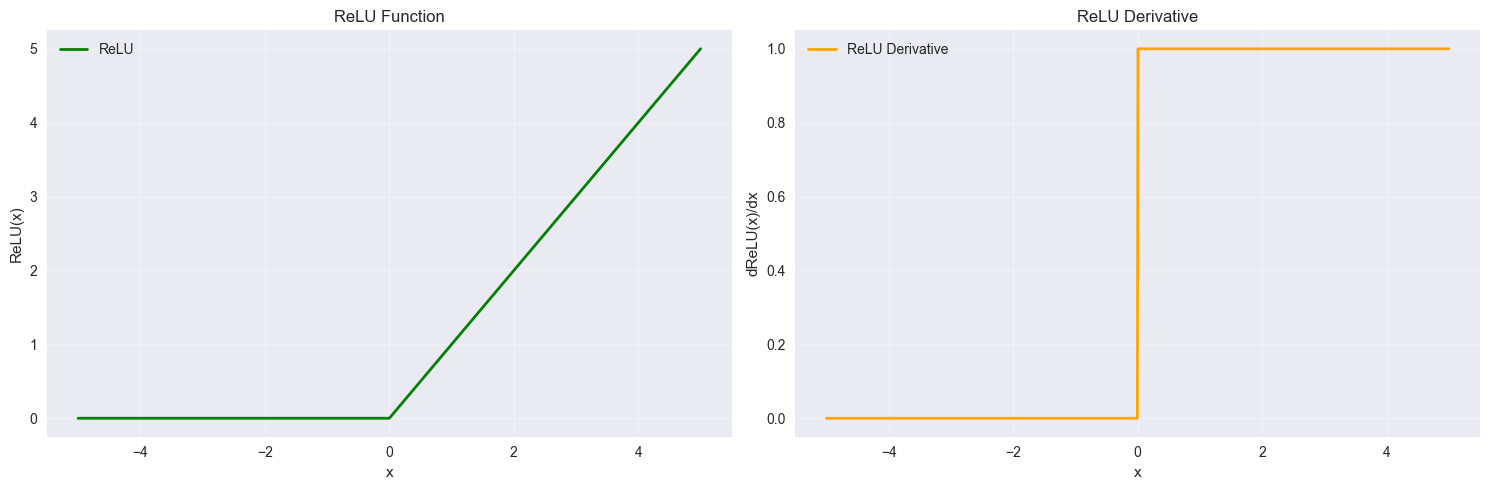

ReLU Properties:
ReLU(0) = 0.0
ReLU(5) = 5.0
ReLU(-5) = 0.0
ReLU derivative at x=5: 1.0
ReLU derivative at x=-5: 0.0


In [4]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

x = np.linspace(-5, 5, 1000)
y_relu = relu(x)
y_relu_derivative = relu_derivative(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(x, y_relu, 'g-', linewidth=2, label='ReLU')
ax1.set_title('ReLU Function')
ax1.set_xlabel('x')
ax1.set_ylabel('ReLU(x)')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(x, y_relu_derivative, 'orange', linewidth=2, label='ReLU Derivative')
ax2.set_title('ReLU Derivative')
ax2.set_xlabel('x')
ax2.set_ylabel('dReLU(x)/dx')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("ReLU Properties:")
print(f"ReLU(0) = {relu(0):.1f}")
print(f"ReLU(5) = {relu(5):.1f}")
print(f"ReLU(-5) = {relu(-5):.1f}")
print(f"ReLU derivative at x=5: {relu_derivative(5):.1f}")
print(f"ReLU derivative at x=-5: {relu_derivative(-5):.1f}")

## 4. TanH (Hyperbolic Tangent)

**Mathematical Definition:** $\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

**Properties:**
- Range: (-1, 1)
- Zero-centered
- Symmetric: tanh(-x) = -tanh(x)
- Related to sigmoid: $\tanh(x) = 2\sigma(2x) - 1$

**Use Cases:** Hidden layers, RNNs, LSTMs

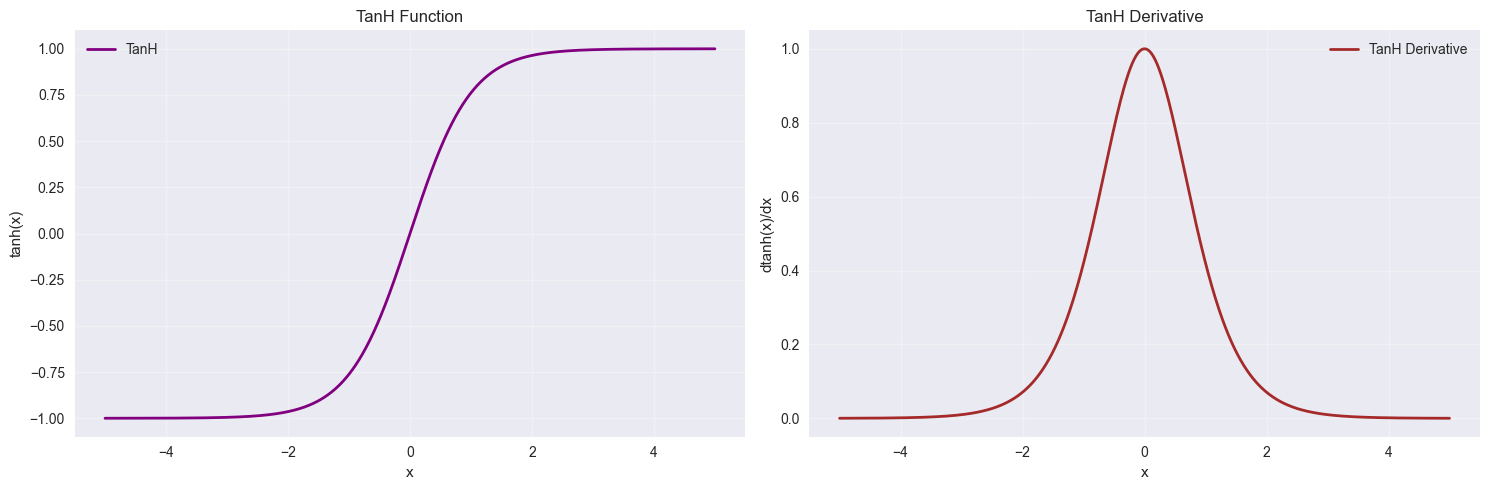

TanH Properties:
tanh(0) = 0.000
tanh(5) = 1.000
tanh(-5) = -1.000
tanh(5) + tanh(-5) = 0.000
Max derivative at x=0: 1.000


In [5]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

x = np.linspace(-5, 5, 1000)
y_tanh = tanh(x)
y_tanh_derivative = tanh_derivative(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(x, y_tanh, 'purple', linewidth=2, label='TanH')
ax1.set_title('TanH Function')
ax1.set_xlabel('x')
ax1.set_ylabel('tanh(x)')
ax1.grid(True, alpha=0.3)
ax1.legend()

ax2.plot(x, y_tanh_derivative, 'brown', linewidth=2, label='TanH Derivative')
ax2.set_title('TanH Derivative')
ax2.set_xlabel('x')
ax2.set_ylabel('dtanh(x)/dx')
ax2.grid(True, alpha=0.3)
ax2.legend()

plt.tight_layout()
plt.show()

print("TanH Properties:")
print(f"tanh(0) = {tanh(0):.3f}")
print(f"tanh(5) = {tanh(5):.3f}")
print(f"tanh(-5) = {tanh(-5):.3f}")
print(f"tanh(5) + tanh(-5) = {tanh(5) + tanh(-5):.3f}")
print(f"Max derivative at x=0: {tanh_derivative(0):.3f}")

## Comparison of All Activation Functions

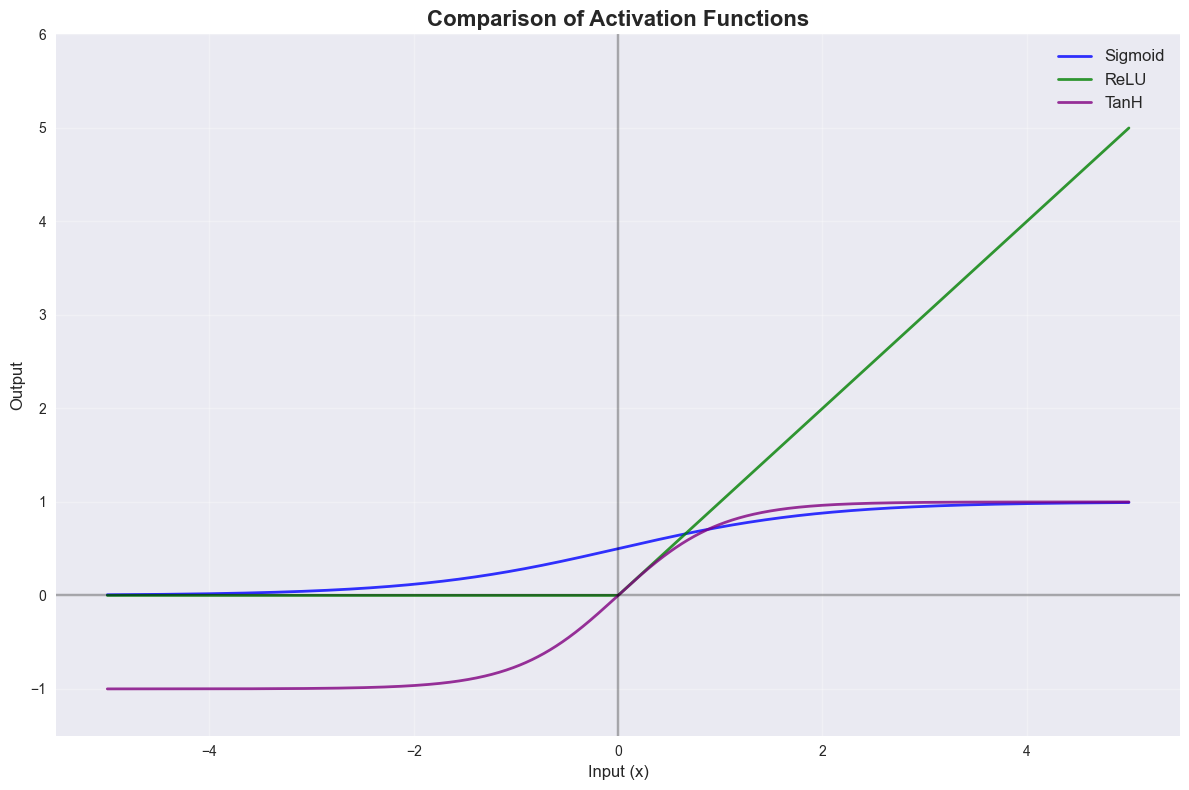

Activation Functions Summary:
Function     Range           Zero-centered   Gradient at x=0 Use Case            
--------------------------------------------------------------------------------
Sigmoid      (0, 1)          No              0.25            Binary classification
Softmax      (0, 1)          No              Complex         Multi-class         
ReLU         [0, ∞)          No              0 or 1          Hidden layers       
TanH         (-1, 1)         Yes             1.0             Hidden layers       


In [6]:
x = np.linspace(-5, 5, 1000)

plt.figure(figsize=(12, 8))

plt.plot(x, sigmoid(x), 'b-', linewidth=2, label='Sigmoid', alpha=0.8)
plt.plot(x, relu(x), 'g-', linewidth=2, label='ReLU', alpha=0.8)
plt.plot(x, tanh(x), 'purple', linewidth=2, label='TanH', alpha=0.8)

plt.title('Comparison of Activation Functions', fontsize=16, fontweight='bold')
plt.xlabel('Input (x)', fontsize=12)
plt.ylabel('Output', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.ylim(-1.5, 6)

plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("Activation Functions Summary:")
print("=" * 80)
print(f"{'Function':<12} {'Range':<15} {'Zero-centered':<15} {'Gradient at x=0':<15} {'Use Case':<20}")
print("-" * 80)
print(f"{'Sigmoid':<12} {'(0, 1)':<15} {'No':<15} {'0.25':<15} {'Binary classification':<20}")
print(f"{'Softmax':<12} {'(0, 1)':<15} {'No':<15} {'Complex':<15} {'Multi-class':<20}")
print(f"{'ReLU':<12} {'[0, ∞)':<15} {'No':<15} {'0 or 1':<15} {'Hidden layers':<20}")
print(f"{'TanH':<12} {'(-1, 1)':<15} {'Yes':<15} {'1.0':<15} {'Hidden layers':<20}")
print("=" * 80)

## Practical Guidelines

### For Output Layers:
- **Binary Classification**: Sigmoid
- **Multi-class Classification**: Softmax
- **Regression**: Linear (no activation) or TanH for bounded outputs

### For Hidden Layers:
- **Deep Networks**: ReLU (most popular)
- **RNNs/LSTMs**: TanH
- **Shallow Networks**: TanH or Sigmoid

### Key Considerations:
- **Vanishing gradients**: Sigmoid and TanH can cause this in deep networks
- **Computational efficiency**: ReLU is much faster
- **Zero-centered outputs**: TanH is better than Sigmoid for hidden layers
- **Sparsity**: ReLU creates sparse representations

## Conclusion

Understanding activation functions is crucial for designing effective neural networks:

1. **Sigmoid**: Classic for binary classification, but suffers from vanishing gradients
2. **Softmax**: Essential for multi-class classification
3. **ReLU**: Most popular for hidden layers, computationally efficient
4. **TanH**: Zero-centered alternative to sigmoid

**Default choice**: Use ReLU for hidden layers in most modern deep learning applications.